In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = '../data/original/train.csv'
df = pd.read_csv(data_path)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=314)

final_train_df = df.copy()

predictive_path = '../data/original/predictive.csv'
predictive_df = pd.read_csv(predictive_path)

processed_train_csv_path = '../data/processed/2_nbhds/train.csv'
processed_test_csv_path = '../data/processed/2_nbhds/test.csv'
processed_final_train_csv_path = '../data/processed/2_nbhds/final_train.csv'
processed_predictive_csv_path = '../data/processed/2_nbhds/predictive.csv'

# processed_train_csv_path = '../data/processed/sentiment/train.csv'
# processed_test_csv_path = '../data/processed/sentiment/test.csv'
# processed_final_train_csv_path = '../data/processed/sentiment/final_train.csv'
# processed_predictive_csv_path = '../data/processed/sentiment/predictive.csv'

processed_train_df = pd.read_csv(processed_train_csv_path)
processed_test_df = pd.read_csv(processed_test_csv_path)
processed_final_train_df = pd.read_csv(processed_final_train_csv_path)
processed_predictive_df = pd.read_csv(processed_predictive_csv_path)

df = processed_train_df.copy()

In [3]:
combined_all = pd.concat([processed_train_df, processed_test_df, processed_final_train_df, processed_predictive_df], ignore_index=True)

# find which features have at least one missing value
features_with_missing = combined_all.columns[combined_all.isnull().any()].tolist()
print(features_with_missing)

['price', 'id']


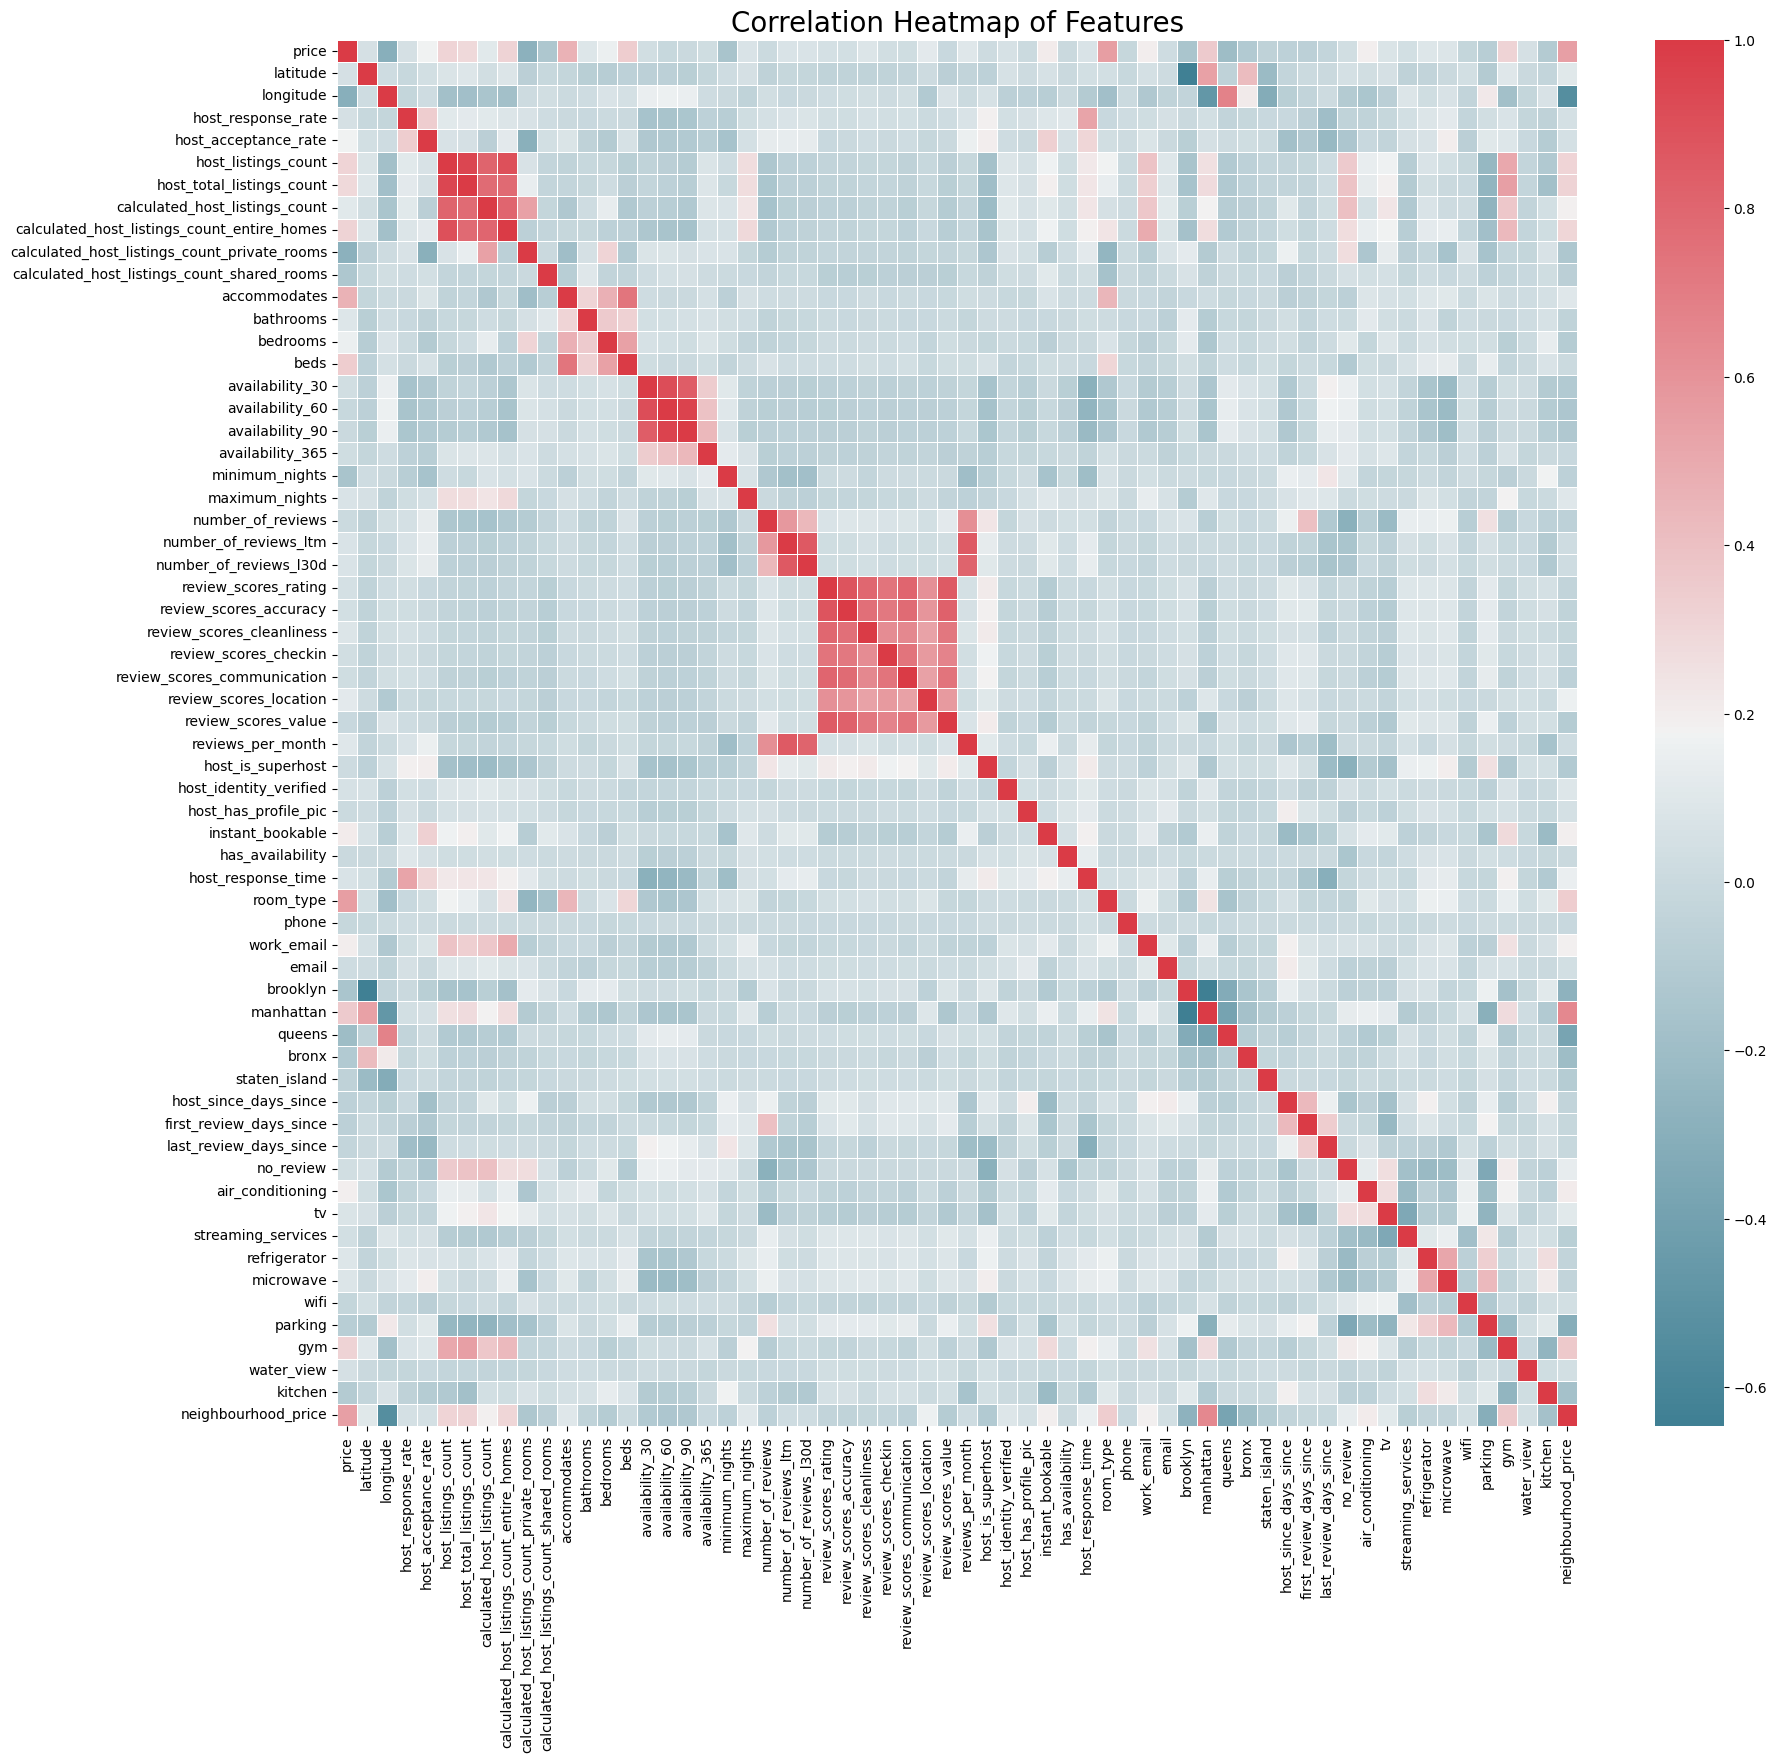

In [4]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=False, cmap=cmap, linewidths=.5)
plt.title('Correlation Heatmap of Features', fontsize=20)
plt.show()

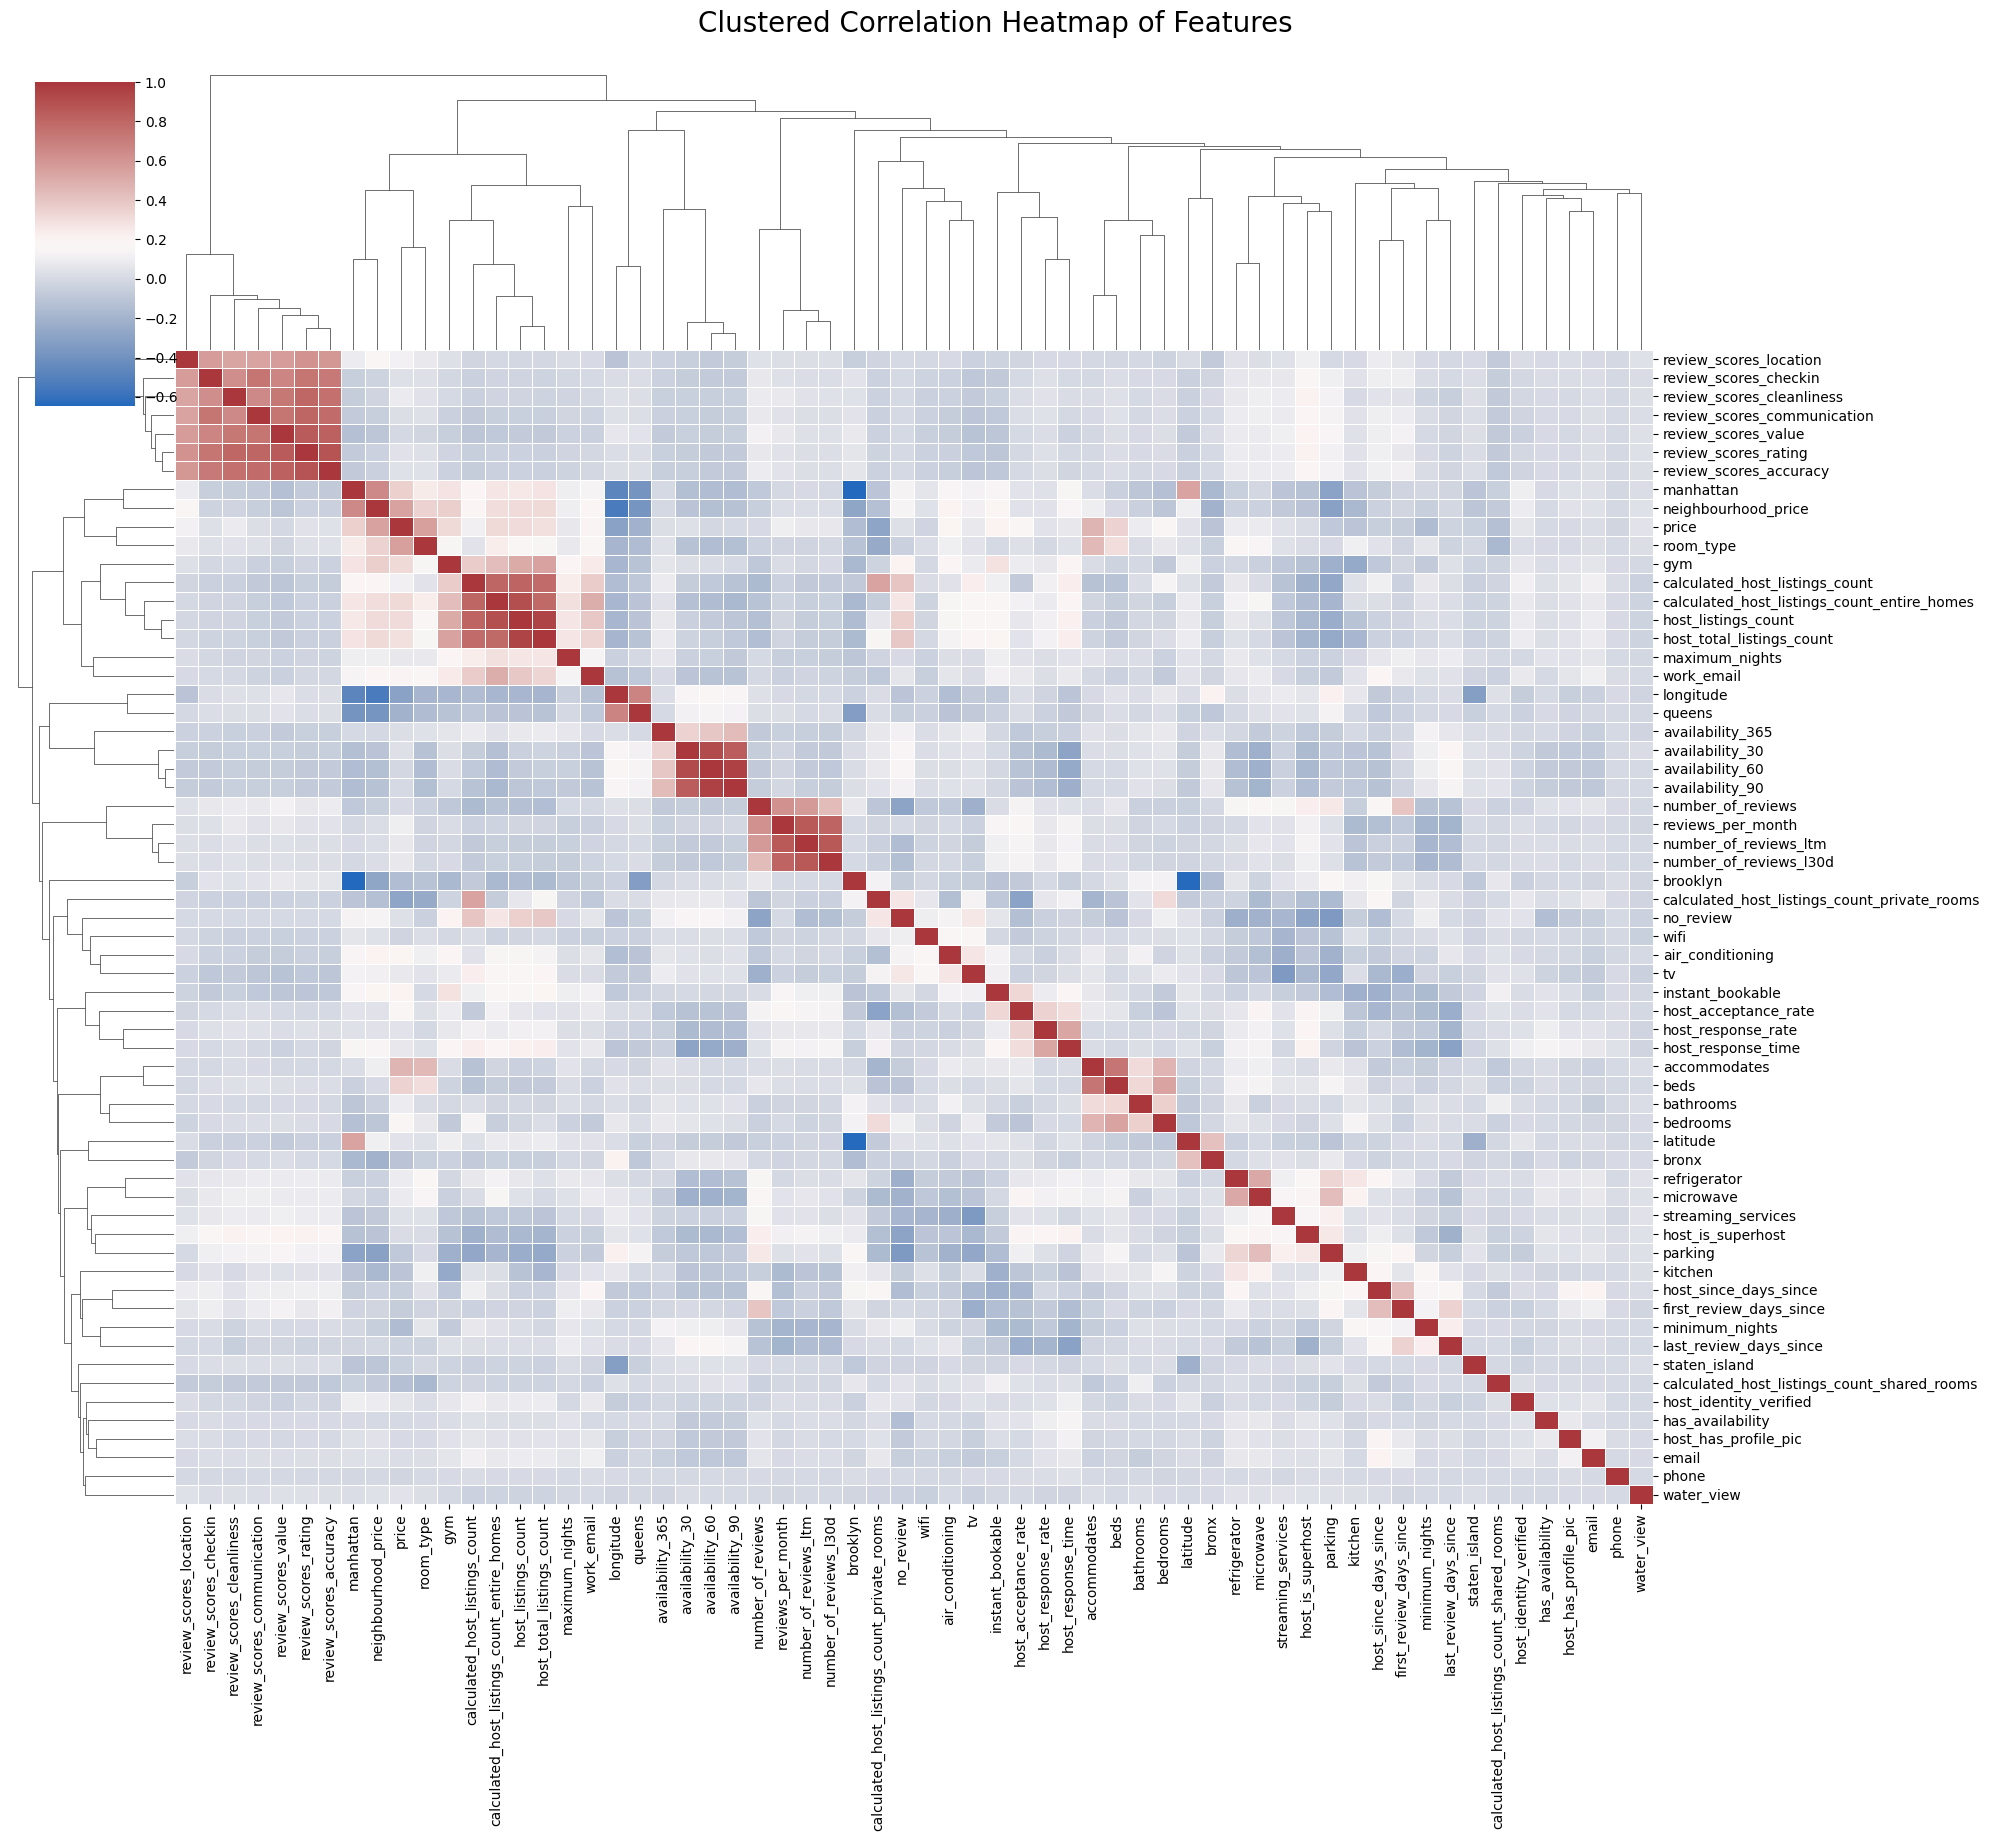

In [5]:
corr_matrix = df.corr()

sns.clustermap(
    corr_matrix,
    figsize=(20, 18),
    cmap='vlag',
    linewidths=.5,
    annot=False,
    fmt=".2f",
    dendrogram_ratio=(.1, .2),
    cbar_pos=(0.02, 0.8, 0.05, 0.18)
)

plt.suptitle('Clustered Correlation Heatmap of Features', fontsize=20, y=1.02)
plt.show()


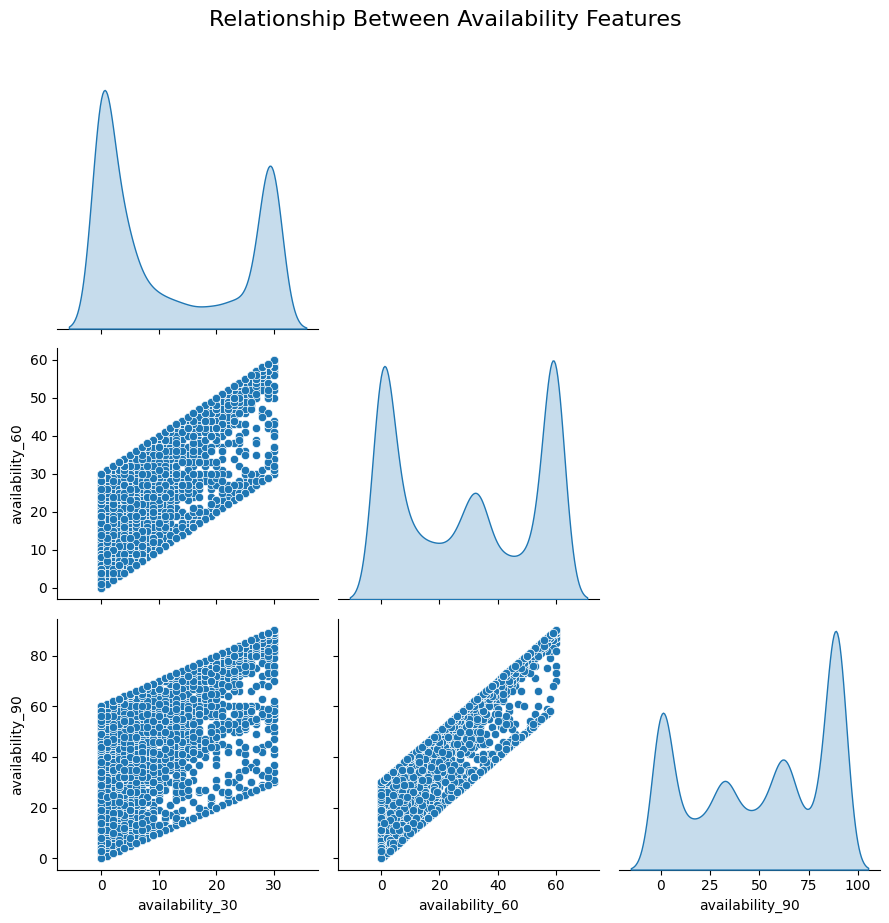

In [ ]:
availability_features = ['availability_30', 'availability_60', 'availability_90']
data = df[availability_features]

sns.pairplot(data, kind="scatter", diag_kind="kde", corner=True, height=3, aspect=1)

plt.suptitle('Relationship Between Availability Features', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

In [7]:
scaler = StandardScaler()

processed_train_df_scaled = scaler.fit_transform(processed_train_df[availability_features])
processed_test_df_scaled = scaler.transform(processed_test_df[availability_features])

final_scaler = StandardScaler()

processed_final_train_df_scaled = final_scaler.fit_transform(processed_final_train_df[availability_features])
processed_predictive_df_scaled = final_scaler.transform(processed_predictive_df[availability_features])

pca = PCA(n_components=1)

availability_short_train = pca.fit_transform(processed_train_df_scaled)
availability_short_test = pca.transform(processed_test_df_scaled)

final_pca = PCA(n_components=1)

availability_short_final_train = final_pca.fit_transform(processed_final_train_df_scaled)
availability_short_predictive = pca.transform(processed_predictive_df_scaled)

processed_train_df['availability_short'] = availability_short_train
processed_test_df['availability_short'] = availability_short_test
processed_final_train_df['availability_short'] = availability_short_final_train
processed_predictive_df['availability_short'] = availability_short_predictive

processed_train_df.drop(columns=availability_features, inplace=True)
processed_test_df.drop(columns=availability_features, inplace=True)
processed_final_train_df.drop(columns=availability_features, inplace=True)
processed_predictive_df.drop(columns=availability_features, inplace=True)

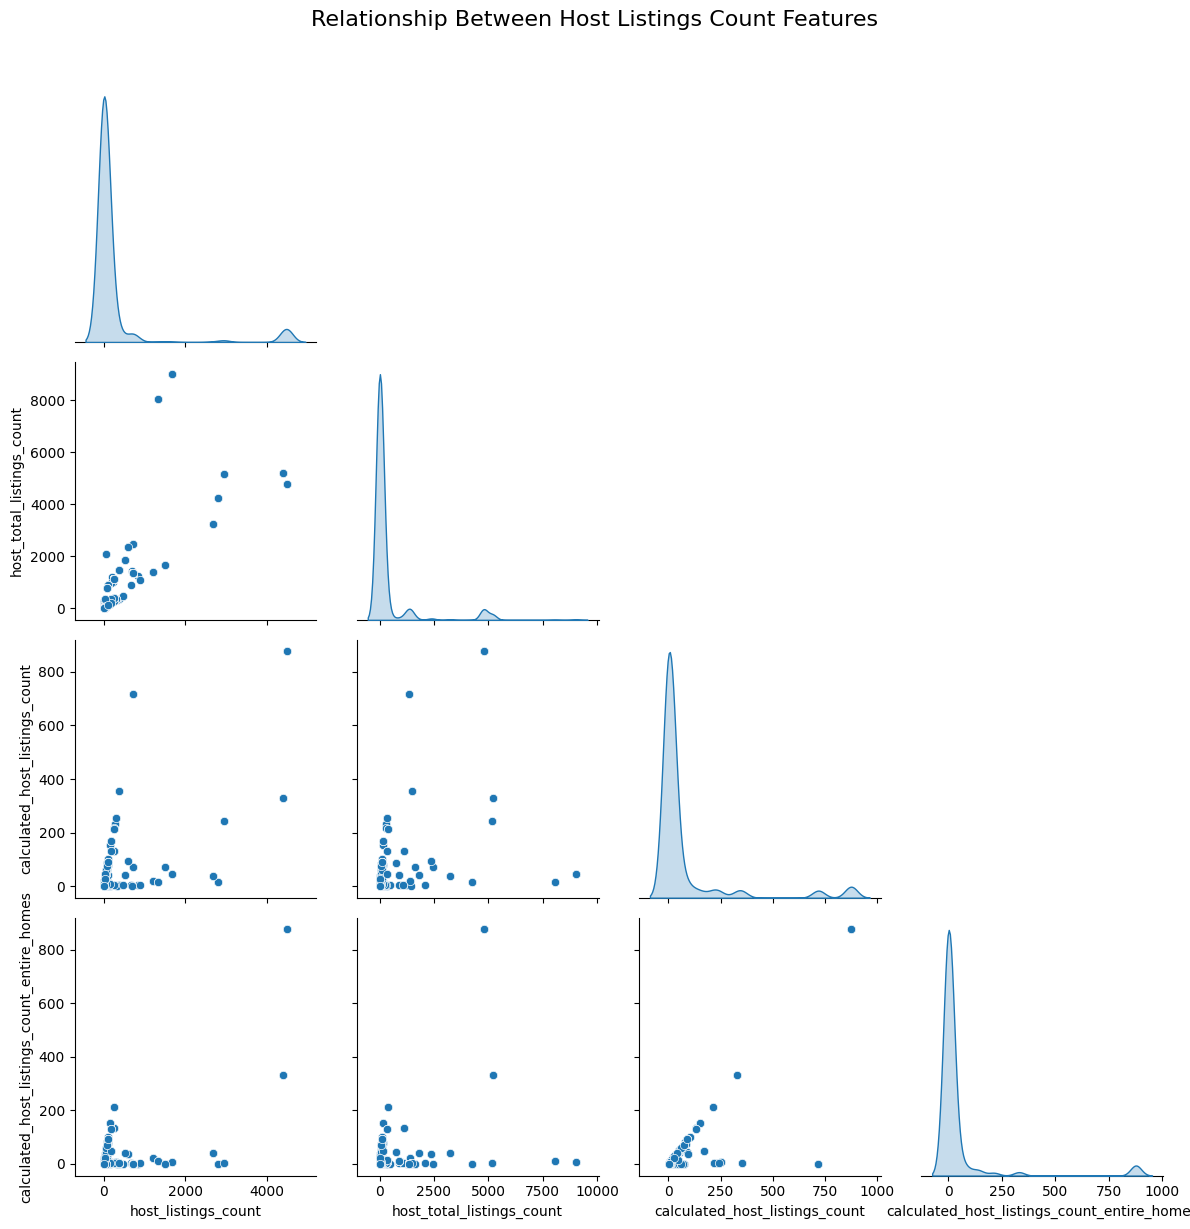

In [8]:
hlc_features = ['host_listings_count', 'host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']

data = df[hlc_features]

sns.pairplot(data, kind="scatter", diag_kind="kde", corner=True, height=3, aspect=1)

plt.suptitle('Relationship Between Host Listings Count Features', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

In [9]:
scaler = StandardScaler()

processed_train_df_scaled = scaler.fit_transform(processed_train_df[hlc_features])
processed_test_df_scaled = scaler.transform(processed_test_df[hlc_features])

final_scaler = StandardScaler()

processed_final_train_df_scaled = final_scaler.fit_transform(processed_final_train_df[hlc_features])
processed_predictive_df_scaled = final_scaler.transform(processed_predictive_df[hlc_features])

pca = PCA(n_components=1)

hlc_short_train = pca.fit_transform(processed_train_df_scaled)
hlc_short_test = pca.transform(processed_test_df_scaled)

final_pca = PCA(n_components=1)

hlc_short_final_train = final_pca.fit_transform(processed_final_train_df_scaled)
hlc_short_predictive = pca.transform(processed_predictive_df_scaled)

processed_train_df['hlc_short'] = hlc_short_train
processed_test_df['hlc_short'] = hlc_short_test
processed_final_train_df['hlc_short'] = hlc_short_final_train
processed_predictive_df['hlc_short'] = hlc_short_predictive

processed_train_df.drop(columns=hlc_features, inplace=True)
processed_test_df.drop(columns=hlc_features, inplace=True)
processed_final_train_df.drop(columns=hlc_features, inplace=True)
processed_predictive_df.drop(columns=hlc_features, inplace=True)

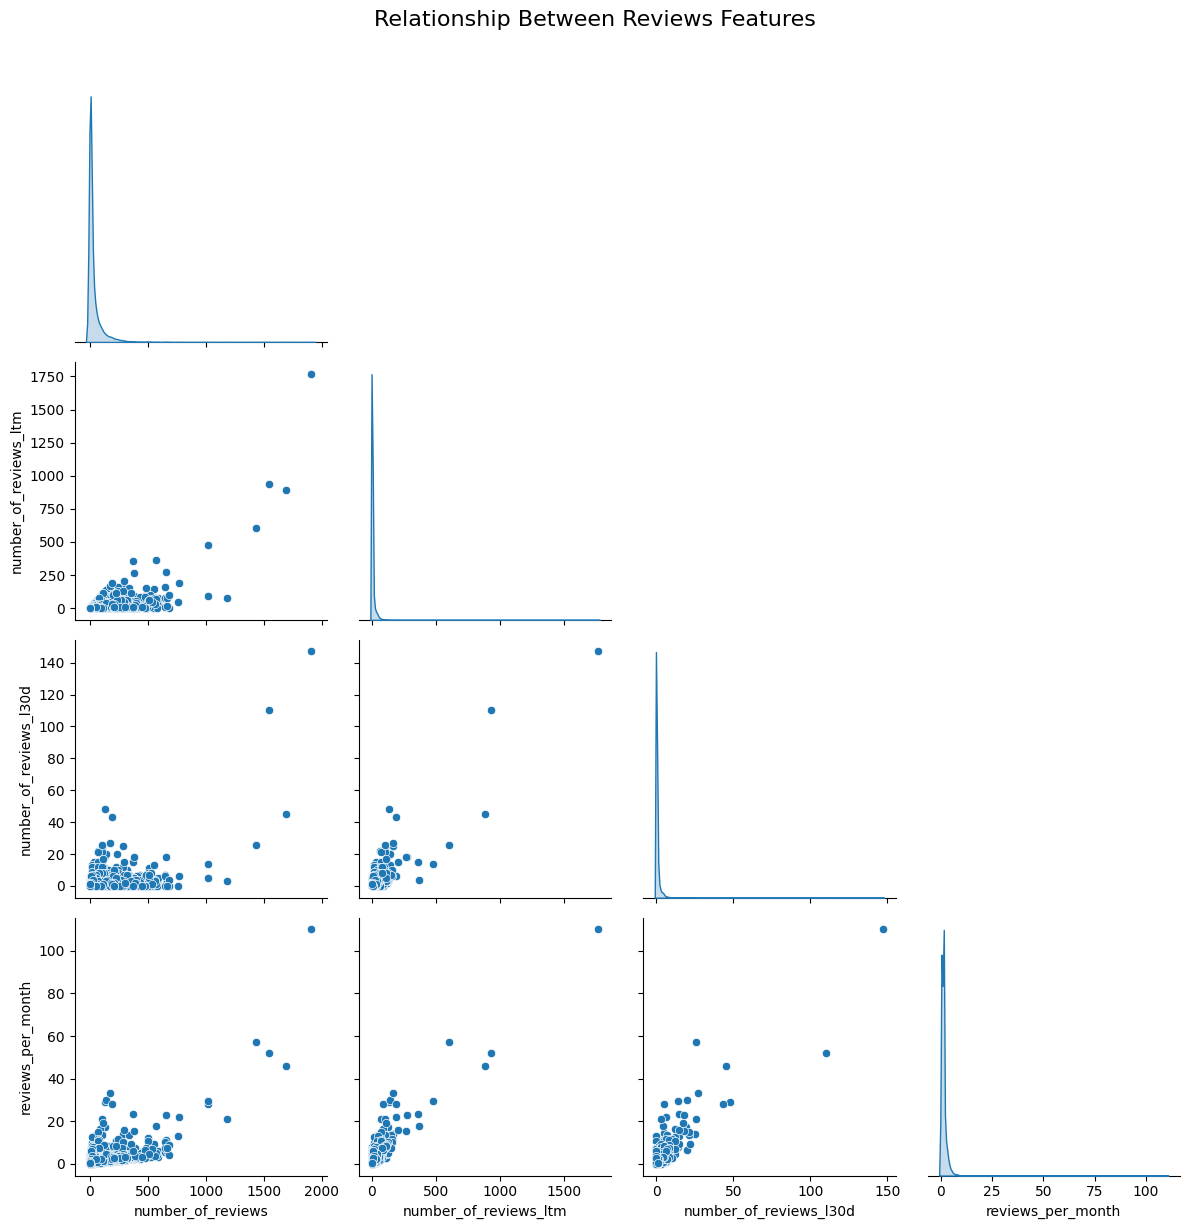

In [10]:
nor_features = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']

data = df[nor_features]

sns.pairplot(data, kind="scatter", diag_kind="kde", corner=True, height=3, aspect=1)

plt.suptitle('Relationship Between Reviews Features', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

In [11]:
scaler = StandardScaler()

processed_train_df_scaled = scaler.fit_transform(processed_train_df[nor_features])
processed_test_df_scaled = scaler.transform(processed_test_df[nor_features])

final_scaler = StandardScaler()

processed_final_train_df_scaled = final_scaler.fit_transform(processed_final_train_df[nor_features])
processed_predictive_df_scaled = final_scaler.transform(processed_predictive_df[nor_features])

pca = PCA(n_components=1)

nor_short_train = pca.fit_transform(processed_train_df_scaled)
nor_short_test = pca.transform(processed_test_df_scaled)

final_pca = PCA(n_components=1)

nor_short_final_train = final_pca.fit_transform(processed_final_train_df_scaled)
nor_short_predictive = pca.transform(processed_predictive_df_scaled)

processed_train_df['nor_short'] = nor_short_train
processed_test_df['nor_short'] = nor_short_test
processed_final_train_df['nor_short'] = nor_short_final_train
processed_predictive_df['nor_short'] = nor_short_predictive

processed_train_df.drop(columns=nor_features, inplace=True)
processed_test_df.drop(columns=nor_features, inplace=True)
processed_final_train_df.drop(columns=nor_features, inplace=True)
processed_predictive_df.drop(columns=nor_features, inplace=True)

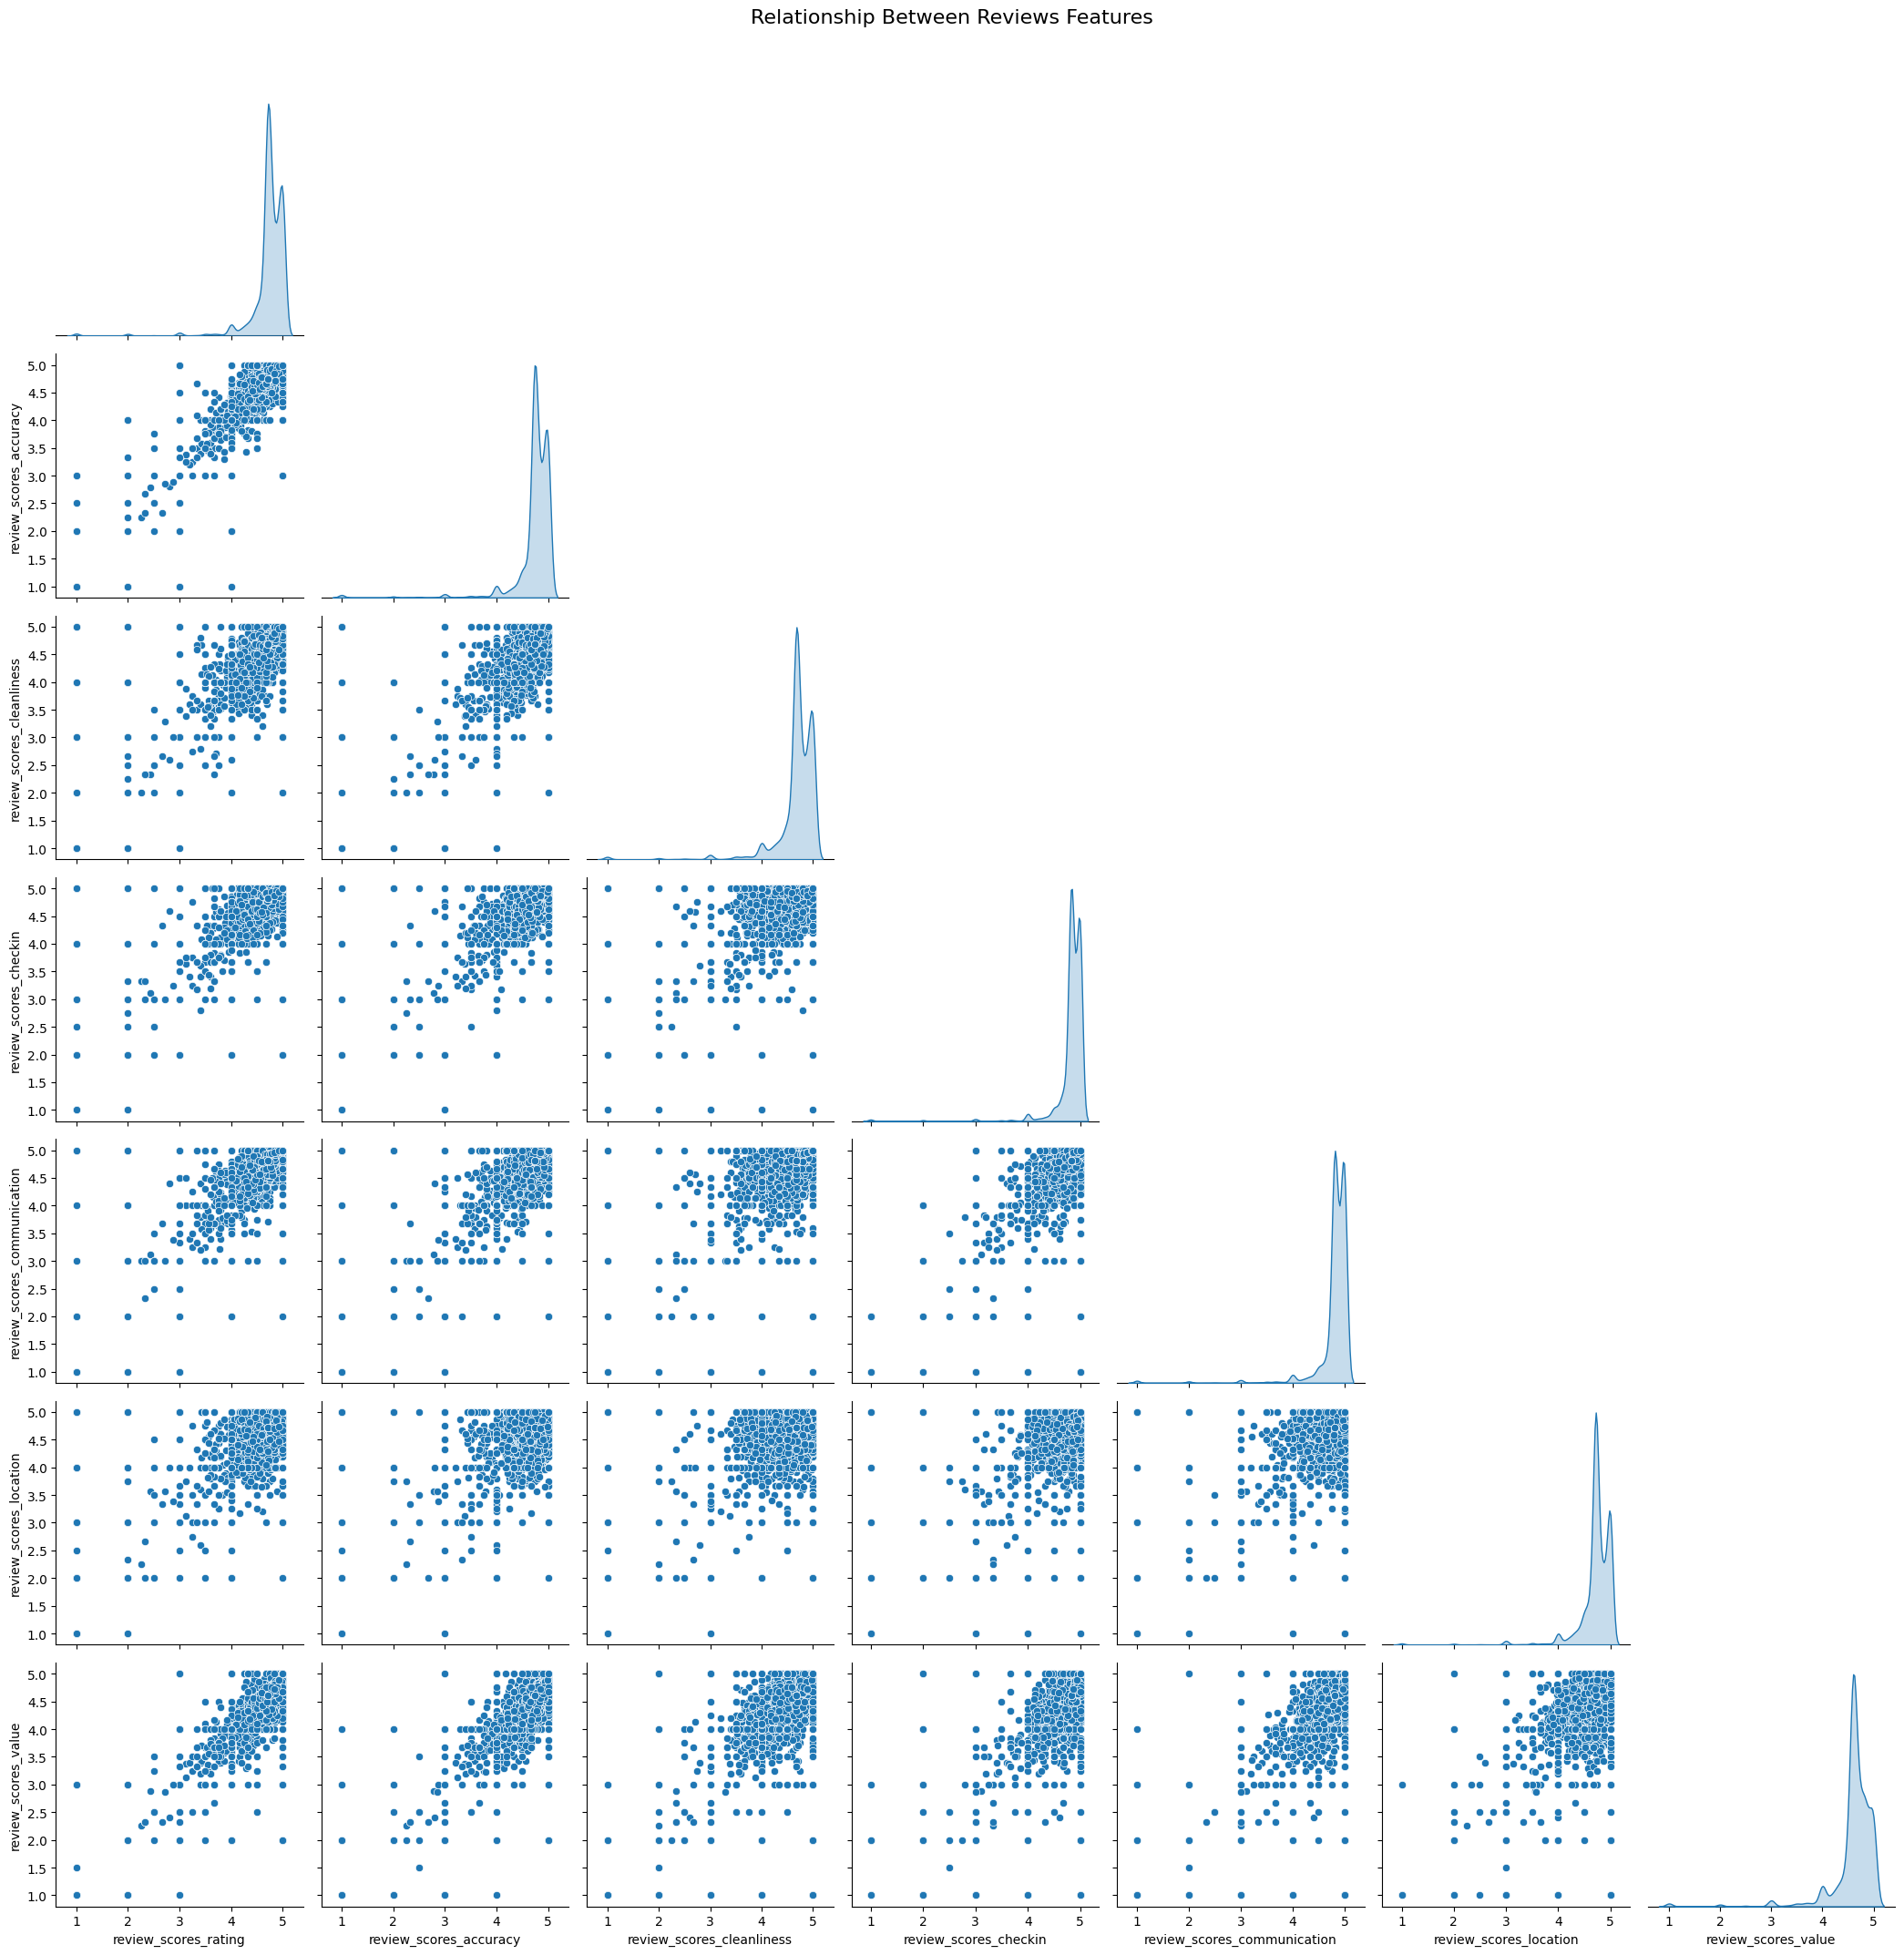

In [12]:
rs_features = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

data = df[rs_features]

sns.pairplot(data, kind="scatter", diag_kind="kde", corner=True, height=3, aspect=1)

plt.suptitle('Relationship Between Reviews Features', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

In [13]:
scaler = StandardScaler()

processed_train_df_scaled = scaler.fit_transform(processed_train_df[rs_features])
processed_test_df_scaled = scaler.transform(processed_test_df[rs_features])

final_scaler = StandardScaler()

processed_final_train_df_scaled = final_scaler.fit_transform(processed_final_train_df[rs_features])
processed_predictive_df_scaled = final_scaler.transform(processed_predictive_df[rs_features])

pca = PCA(n_components=1)

rs_short_train = pca.fit_transform(processed_train_df_scaled)
rs_short_test = pca.transform(processed_test_df_scaled)

final_pca = PCA(n_components=1)

rs_short_final_train = final_pca.fit_transform(processed_final_train_df_scaled)
rs_short_predictive = pca.transform(processed_predictive_df_scaled)

processed_train_df['rs_short'] = rs_short_train
processed_test_df['rs_short'] = rs_short_test
processed_final_train_df['rs_short'] = rs_short_final_train
processed_predictive_df['rs_short'] = rs_short_predictive

processed_train_df.drop(columns=rs_features, inplace=True)
processed_test_df.drop(columns=rs_features, inplace=True)
processed_final_train_df.drop(columns=rs_features, inplace=True)
processed_predictive_df.drop(columns=rs_features, inplace=True)

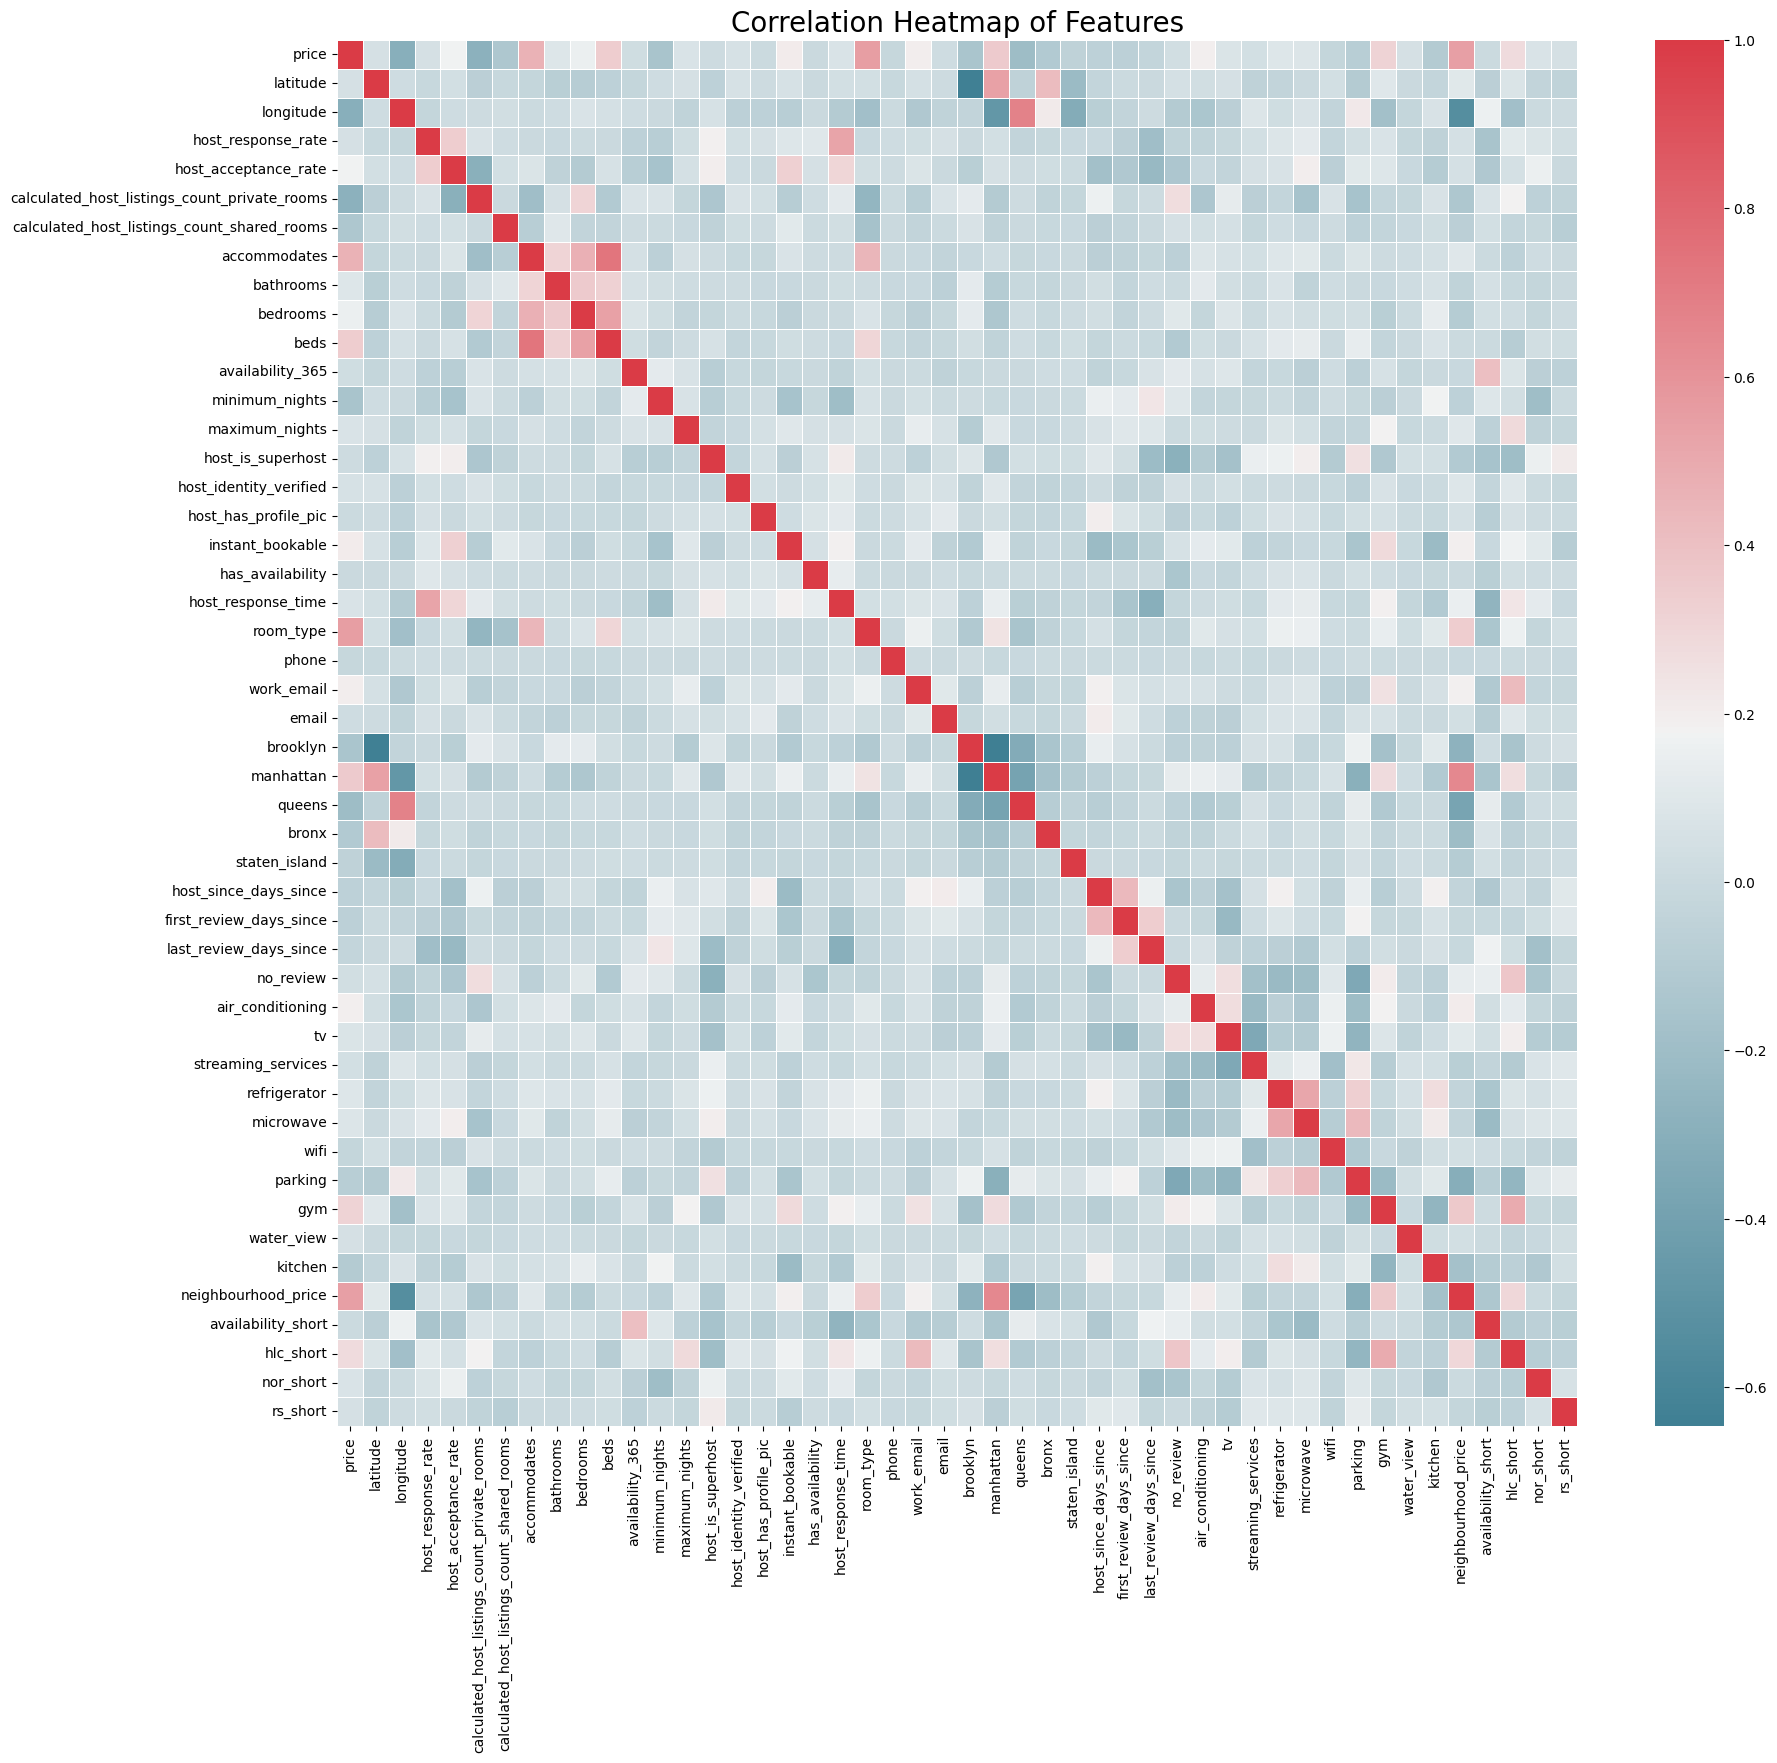

In [14]:
corr_matrix = processed_train_df.corr()
plt.figure(figsize=(20, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=False, cmap=cmap, linewidths=.5)
plt.title('Correlation Heatmap of Features', fontsize=20)
plt.show()

In [15]:
print(processed_train_df.shape)

(12556, 48)


In [16]:
# ----------------- Save Data -----------------
print('Saving data...')

processed_train_csv_path = '../data/processed/4_pca/train.csv'
processed_test_csv_path = '../data/processed/4_pca/test.csv'
processed_final_train_csv_path = '../data/processed/4_pca/final_train.csv'
processed_predictive_csv_path = '../data/processed/4_pca/predictive.csv'

processed_train_df.to_csv(processed_train_csv_path, index=False)
processed_test_df.to_csv(processed_test_csv_path, index=False)
processed_final_train_df.to_csv(processed_final_train_csv_path, index=False)
processed_predictive_df.to_csv(processed_predictive_csv_path, index=False)

Saving data...
